In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Task 1: Data Exploration
# Load the dataset into a Python environment (e.g., JupyterNotebook).
# Display the first few rows of the dataset to understand its structure.
# Check for missing values and handle them if necessary.
# Summarize basic statistics (mean, median, standard deviation, etc.)for the numeric columns.

In [5]:
loanfile = "C:/Users/subro/Downloads/loan_sanction_test.csv"
loandata = pd.read_csv(loanfile)

In [19]:
print("                   First Few Rows Of The Dataset:- ")
print(loandata.head())
print()
print(loandata.info())

                   First Few Rows Of The Dataset:- 
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2   

In [17]:
print("\nMissing values in each column:-")
print(loandata.isnull().sum())


Missing values in each column:-
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [27]:
loandata['Gender'].fillna(loandata['Gender'].mode()[0], inplace=True)
loandata['Dependents'].fillna(loandata['Dependents'].mode()[0], inplace=True)
loandata['Self_Employed'].fillna(loandata['Self_Employed'].mode()[0], inplace=True)
loandata['LoanAmount'].fillna(loandata['LoanAmount'].mean(), inplace=True)
loandata['Loan_Amount_Term'].fillna(loandata['Loan_Amount_Term'].mode()[0], inplace=True)
loandata['Credit_History'].fillna(loandata['Credit_History'].mode()[0], inplace=True)

In [28]:
check_missing_values_after_imputation = loandata.isnull().sum()
check_missing_values_after_imputation

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [30]:
print(loandata.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  367.000000        367.000000   
mean       4805.599455        1569.577657  135.980926        342.822888   
std        4910.685399        2334.232099   60.959739         64.658402   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  101.000000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  157.500000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      367.000000  
mean         0.839237  
std          0.367814  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


# Task 2: Data Visualization
# 2.1 Univariate Analysis
# Explore the distribution of numeric columns using the following visualizations:
# Histograms: Plot the frequency distribution of key numeric variables.
# Box Plots: Identify potential outliers and visualize the spread of data.
# Analyze categorical variables by creating the following plots:
# Bar Charts: Visualize the frequency distribution of categoricalvariables.
# Pie Charts: Represent the composition of categorical variables

C:\Users\subro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\subro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\subro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


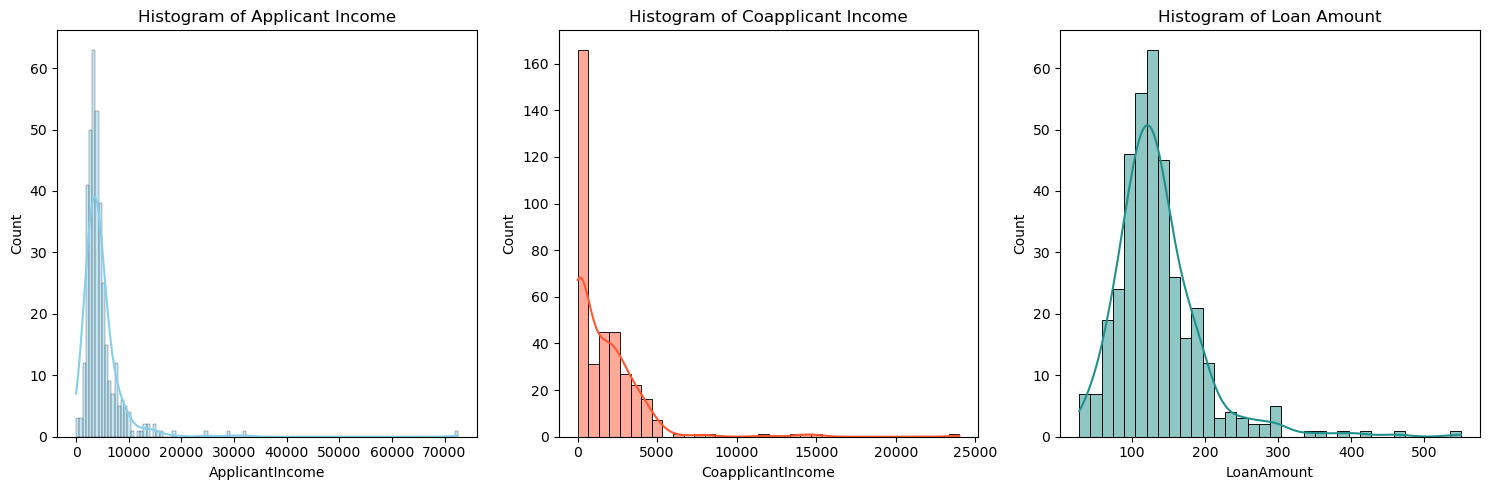

In [49]:
# Univariate Analysis: Histograms for numeric columns :-

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(loandata['ApplicantIncome'], kde=True,color='skyblue', edgecolor='black')
plt.title(f'Histogram of Applicant Income')

plt.subplot(1, 3, 2)
sns.histplot(loandata['CoapplicantIncome'], kde=True,color='#FF5733', edgecolor='black')
plt.title(f'Histogram of Coapplicant Income')

plt.subplot(1, 3, 3)
sns.histplot(loandata['LoanAmount'], kde=True,color=plt.cm.viridis(0.5), edgecolor='black')
plt.title(f'Histogram of Loan Amount')

plt.tight_layout()
plt.show()

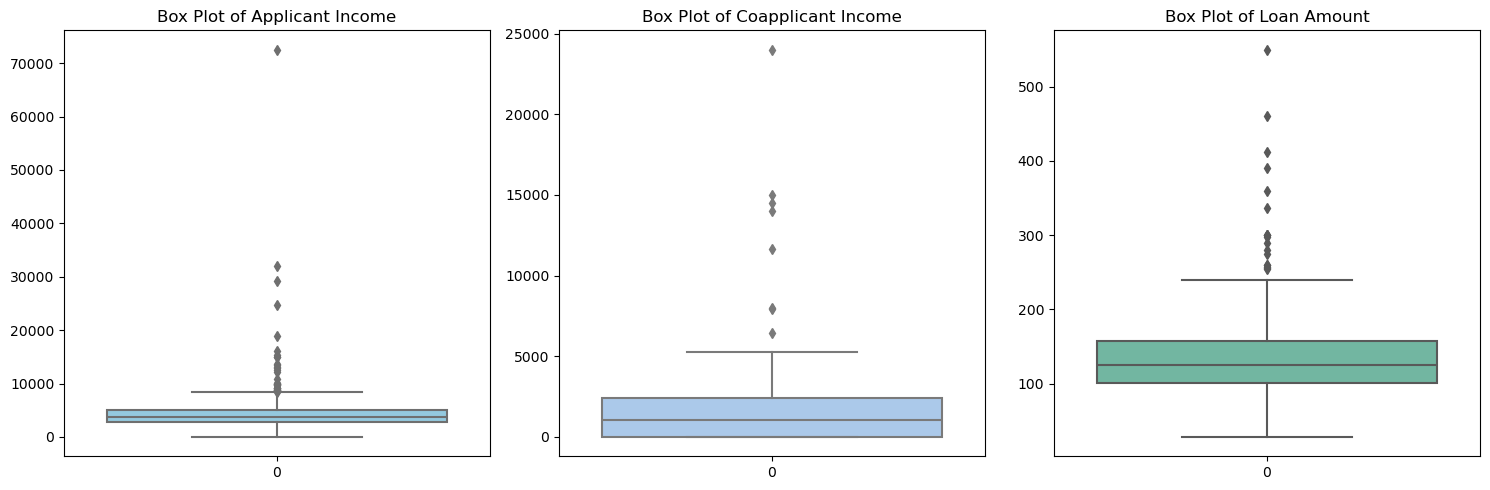

In [52]:
# Univariate Analysis: Box Plots for numeric columns :-

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(loandata['ApplicantIncome'],color='skyblue')
plt.title(f'Box Plot of Applicant Income')
plt.subplot(1, 3, 2)
sns.boxplot(loandata['CoapplicantIncome'],palette='pastel')
plt.title(f'Box Plot of Coapplicant Income')
plt.subplot(1, 3, 3)
sns.boxplot(loandata['LoanAmount'],palette='Set2')
plt.title(f'Box Plot of Loan Amount')

plt.tight_layout()
plt.show()

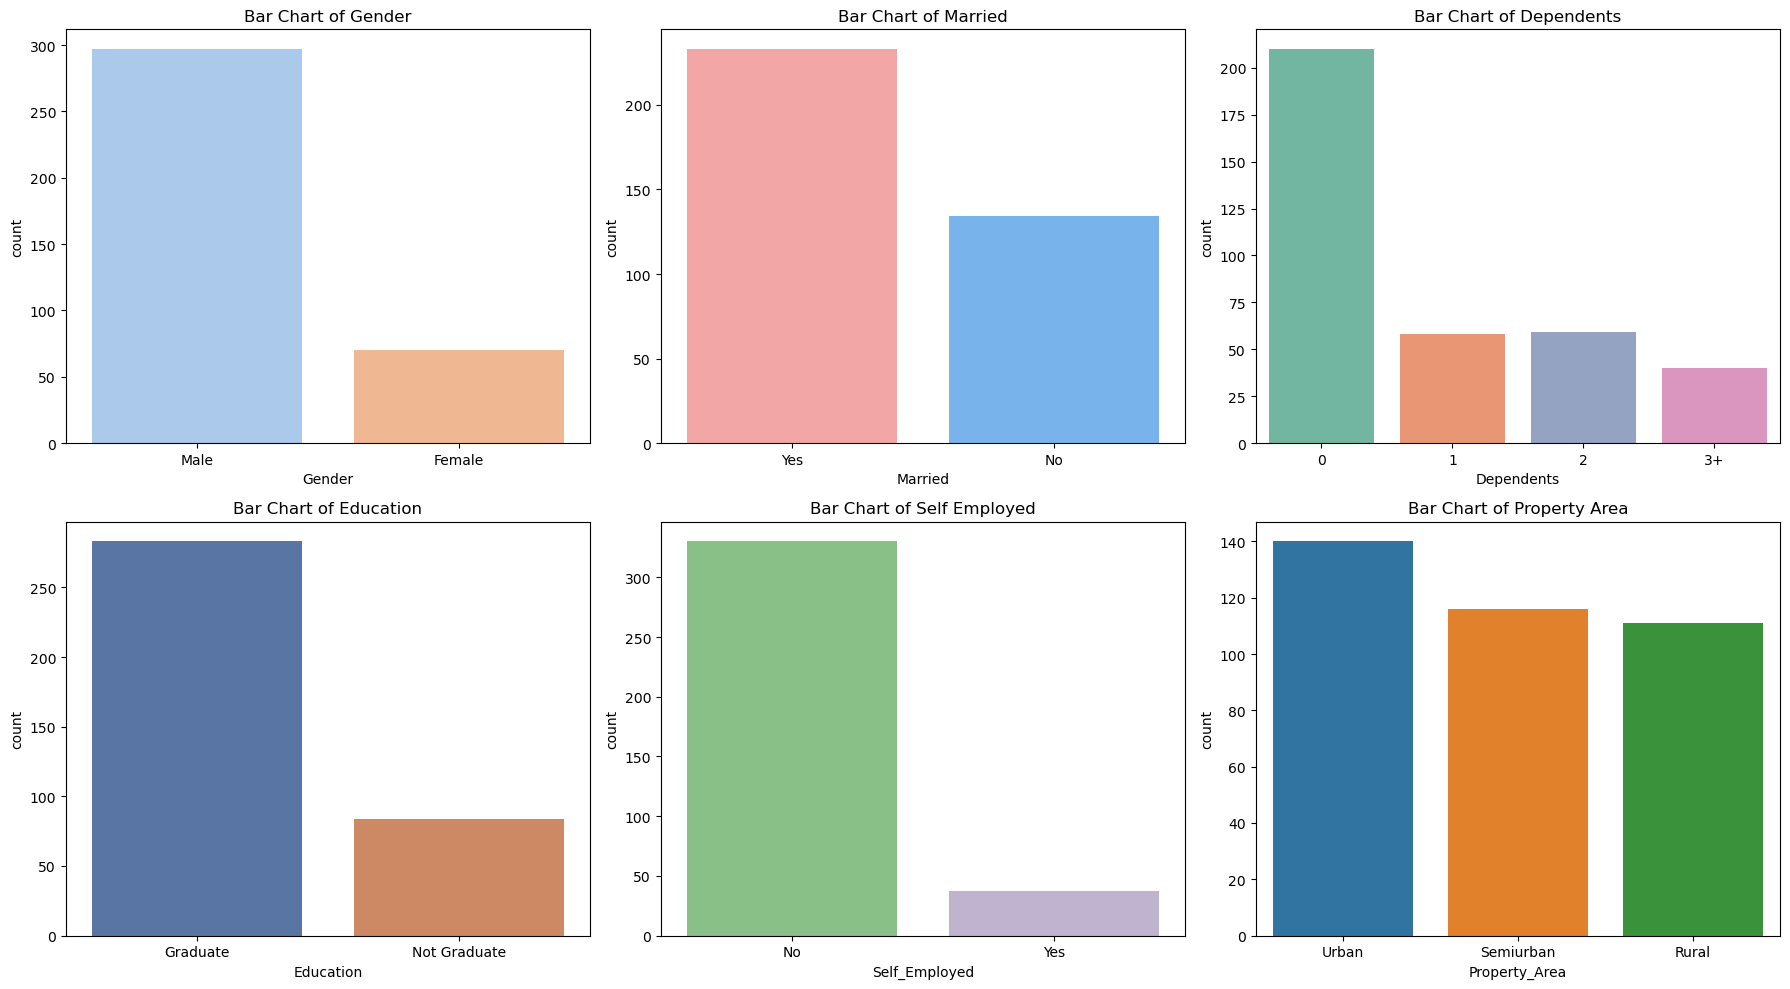

In [56]:
# Univariate Analysis: Bar Charts for categorical columns :-

plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=loandata,palette='pastel')
plt.title(f'Bar Chart of Gender')
plt.subplot(2, 3, 2)
sns.countplot(x='Married', data=loandata,palette=['#FF9999', '#66B3FF'])
plt.title(f'Bar Chart of Married')
plt.subplot(2, 3, 3)
sns.countplot(x='Dependents', data=loandata, palette='Set2')
plt.title(f'Bar Chart of Dependents')
plt.subplot(2, 3, 4)
sns.countplot(x='Education', data=loandata,palette='deep')
plt.title(f'Bar Chart of Education')
plt.subplot(2, 3, 5)
sns.countplot(x='Self_Employed', data=loandata,palette='Accent')
plt.title(f'Bar Chart of Self Employed')
plt.subplot(2, 3, 6)
sns.countplot(x='Property_Area', data=loandata)
plt.title(f'Bar Chart of Property Area')
plt.tight_layout()
plt.show()

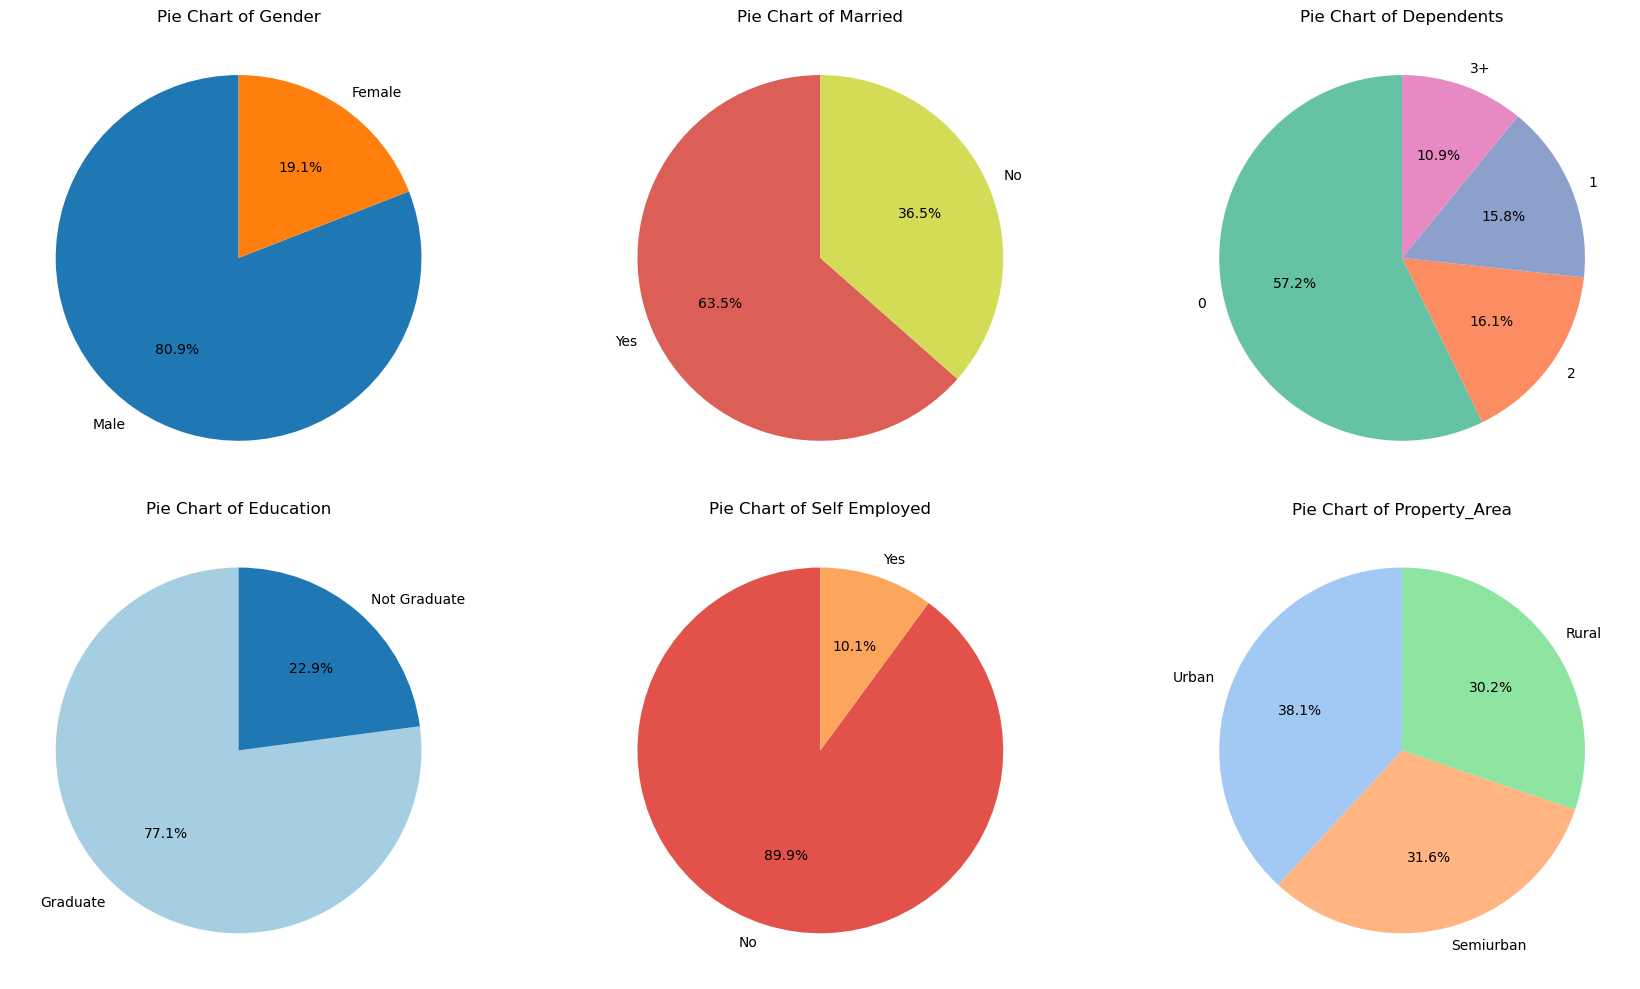

In [48]:
# Univariate Analysis: Pie Charts for categorical columns :-
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
loandata['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('tab10'))
plt.title(f'Pie Chart of Gender')
plt.ylabel('')
plt.subplot(2, 3, 2)
loandata['Married'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('hls'))
plt.title(f'Pie Chart of Married')
plt.ylabel('')
plt.subplot(2, 3, 3)
loandata['Dependents'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title(f'Pie Chart of Dependents')
plt.ylabel('')
plt.subplot(2, 3, 4)
loandata['Education'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Paired'))
plt.title(f'Pie Chart of Education')
plt.ylabel('')
plt.subplot(2, 3, 5)
loandata['Self_Employed'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Spectral'))
plt.title(f'Pie Chart of Self Employed')
plt.ylabel('')
plt.subplot(2, 3, 6)
loandata['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title(f'Pie Chart of Property_Area')
plt.ylabel('')

plt.tight_layout()
plt.show()

# 2.2 Bivariate Analysis
# Create scatter plots to explore relationships between pairs of numeric variables.
# Use pair plots (scatter matrix) to visualize interactions betweenmultiple numeric variables simultaneously.
# Investigate the relationship between categorical and numeric variables using box plots or violin plots.

C:\Users\subro\AppData\Local\Temp\ipykernel_53668\1413935868.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=loandata,palette='Set2', edgecolor='black')
C:\Users\subro\AppData\Local\Temp\ipykernel_53668\1413935868.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', data=loandata,palette=['#FF9999', '#66B3FF', '#99FF99'],edgecolor='black')
C:\Users\subro\AppData\Local\Temp\ipykernel_53668\1413935868.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', data=loandata,palette='dark',edgecolor='black')


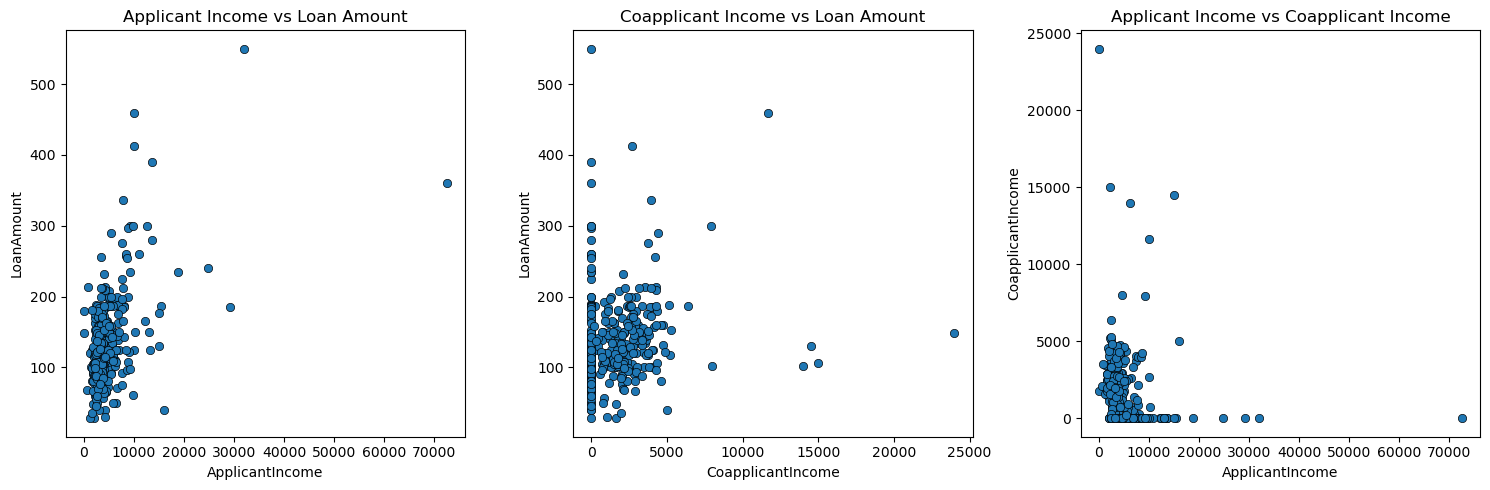

In [62]:
# Bivariate Analysis: Scatter plots for numeric columns
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=loandata,palette='Set2', edgecolor='black')
plt.title('Applicant Income vs Loan Amount')
plt.subplot(1, 3, 2)
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', data=loandata,palette=['#FF9999', '#66B3FF', '#99FF99'],edgecolor='black')
plt.title('Coapplicant Income vs Loan Amount')
plt.subplot(1, 3, 3)
sns.scatterplot(x='ApplicantIncome', y='CoapplicantIncome', data=loandata,palette='dark',edgecolor='black')
plt.title('Applicant Income vs Coapplicant Income')

plt.tight_layout()
plt.show()

C:\Users\subro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\subro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\subro\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


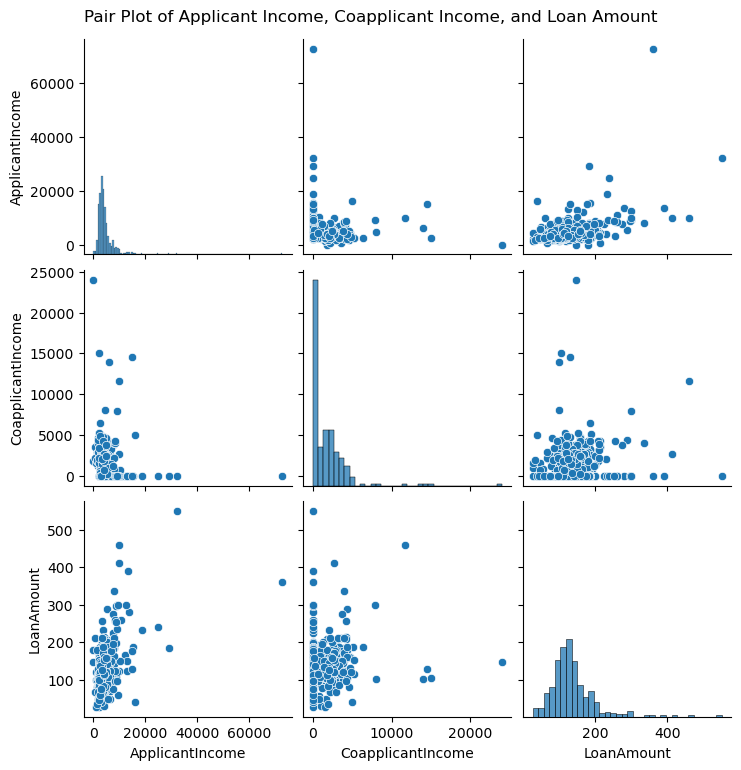

In [70]:
# Pair plot to visualize interactions between multiple numeric variables
sns.pairplot(loandata[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.suptitle('Pair Plot of Applicant Income, Coapplicant Income, and Loan Amount', y=1.02)
plt.show()

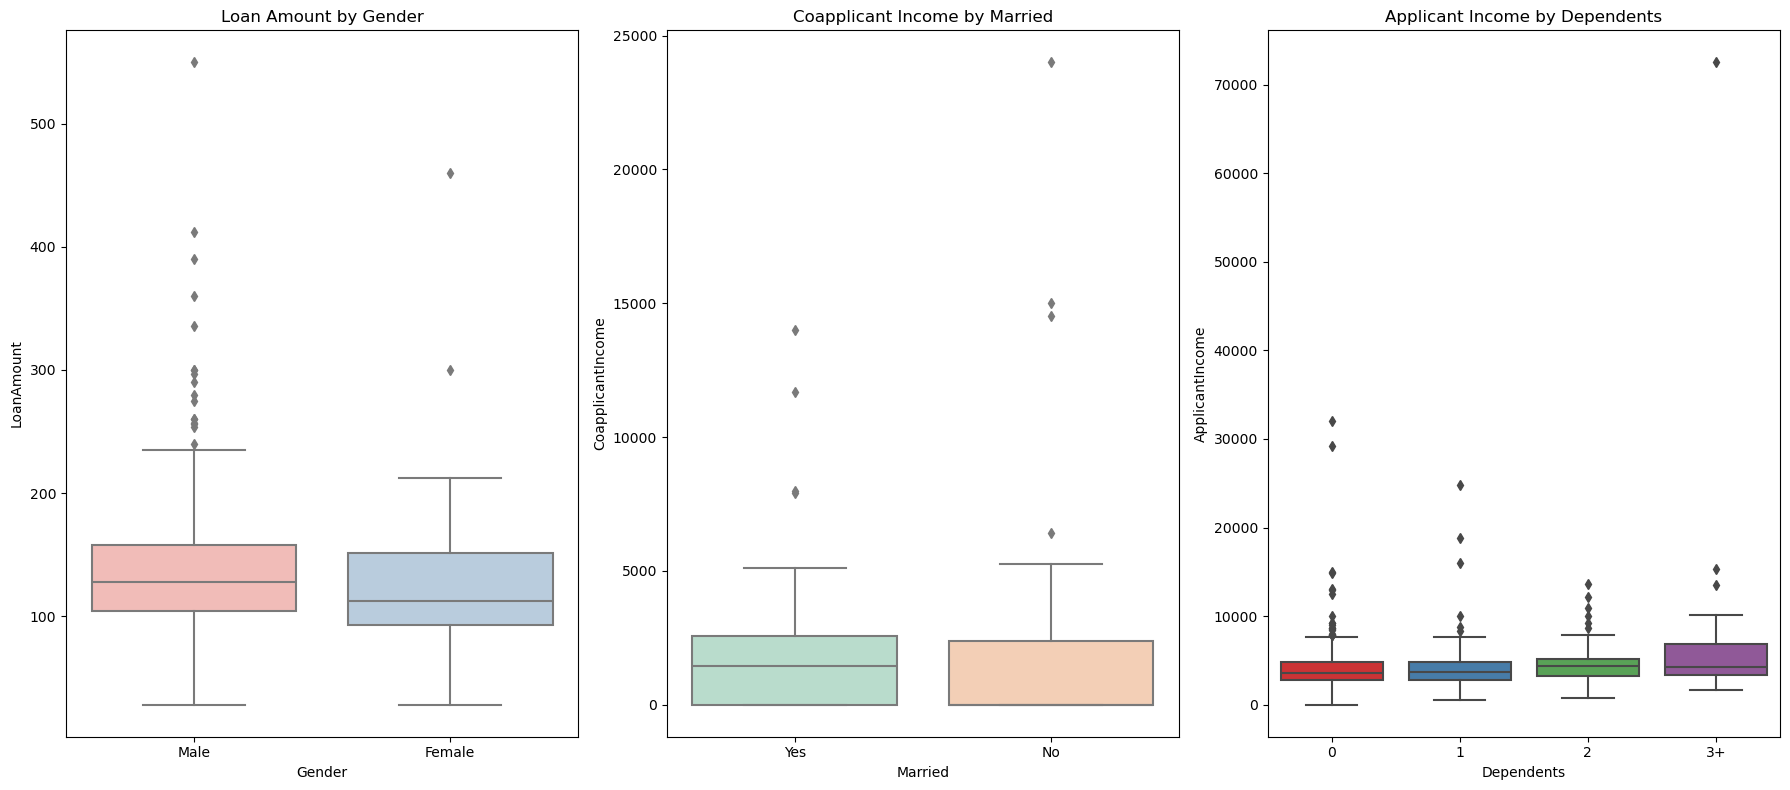

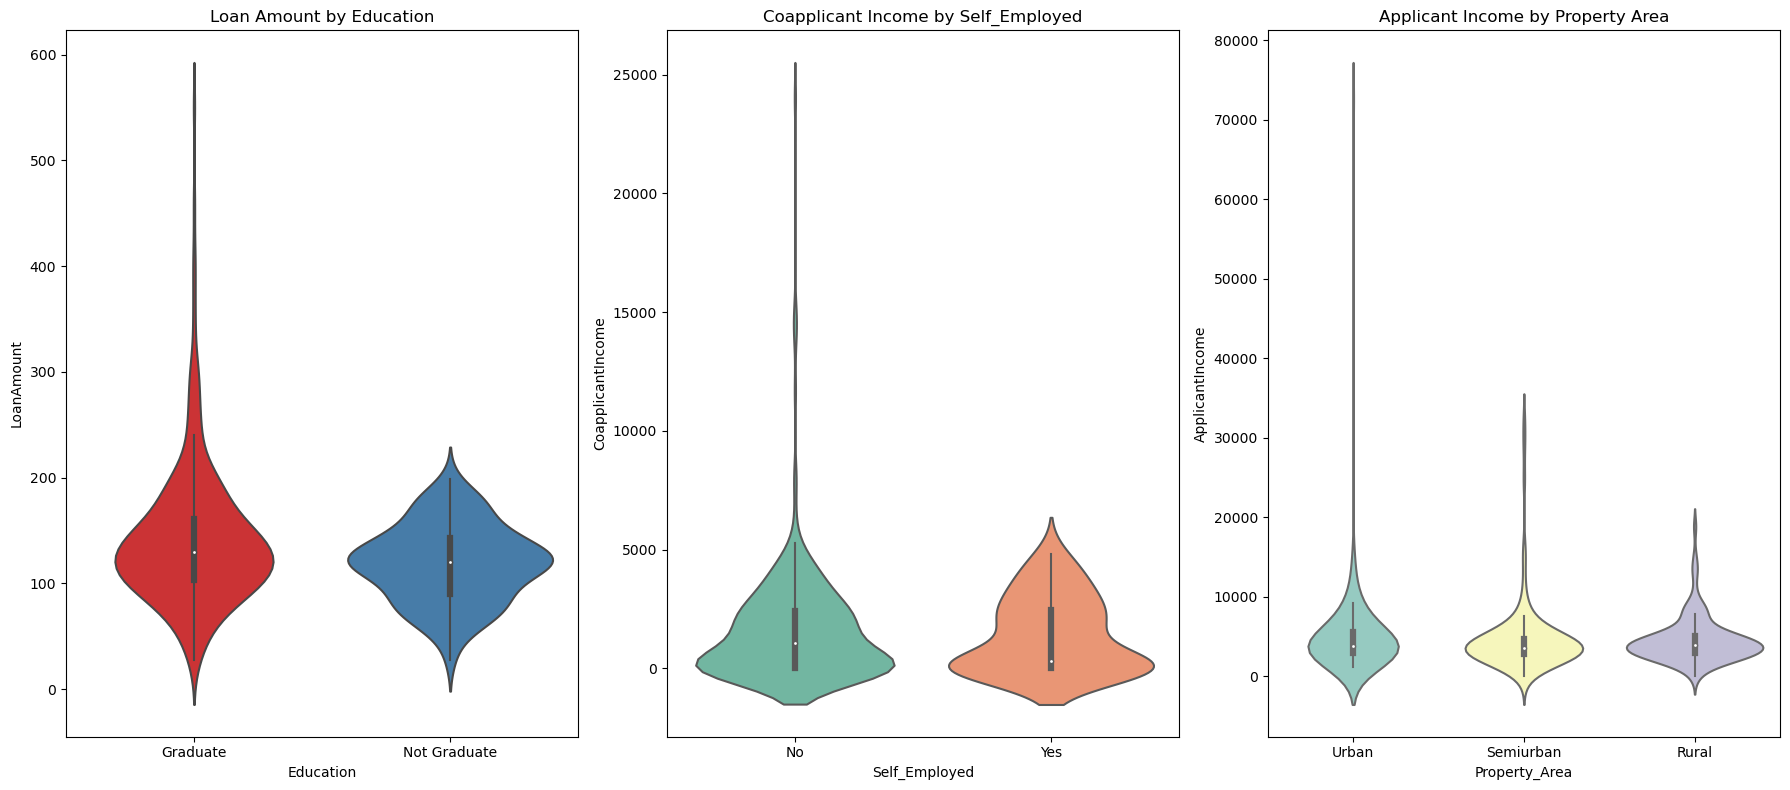

In [77]:
# Bivariate Analysis: 
#Box plots for categorical vs numeric :-
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='LoanAmount', data=loandata, palette='Pastel1')
plt.title('Loan Amount by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='Married', y='CoapplicantIncome', data=loandata, palette='Pastel2')
plt.title('Coapplicant Income by Married')

plt.subplot(1, 3, 3)
sns.boxplot(x='Dependents', y='ApplicantIncome', data=loandata, palette='Set1')
plt.title('Applicant Income by Dependents')

plt.tight_layout()
plt.show()

# Violin plots for categorical vs numeric variables
plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
sns.violinplot(x='Education', y='LoanAmount', data=loandata, palette='Set1')
plt.title('Loan Amount by Education')

plt.subplot(1, 3, 2)
sns.violinplot(x='Self_Employed', y='CoapplicantIncome', data=loandata, palette='Set2')
plt.title('Coapplicant Income by Self_Employed')

plt.subplot(1, 3, 3)
sns.violinplot(x='Property_Area', y='ApplicantIncome', data=loandata, palette='Set3')
plt.title('Applicant Income by Property Area')

plt.tight_layout()
plt.show()

# 2.3 Multivariate Analysis
# Perform a correlation analysis to identify relationships between numeric variables. Visualize correlations using a heatmap.
# Create a stacked bar chart to show the distribution of categorical variables across multiple categories.

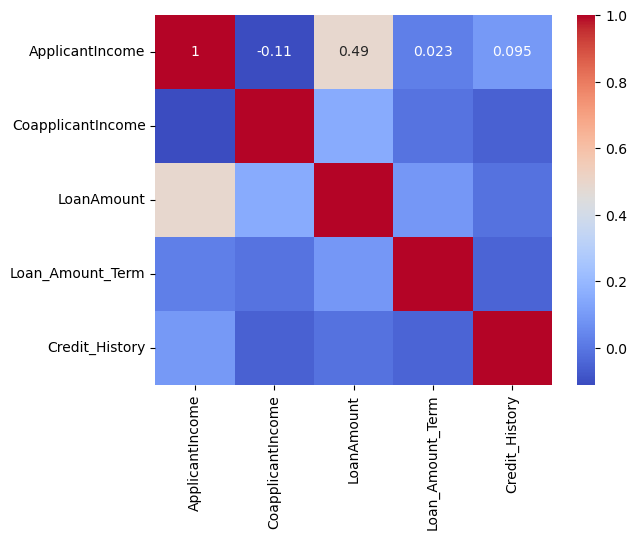

In [79]:
# Select only numeric columns

numeric_data = loandata.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corliation = numeric_data.corr()

# Plot heatmap
sns.heatmap(corliation, annot=True, cmap='coolwarm')
plt.show()

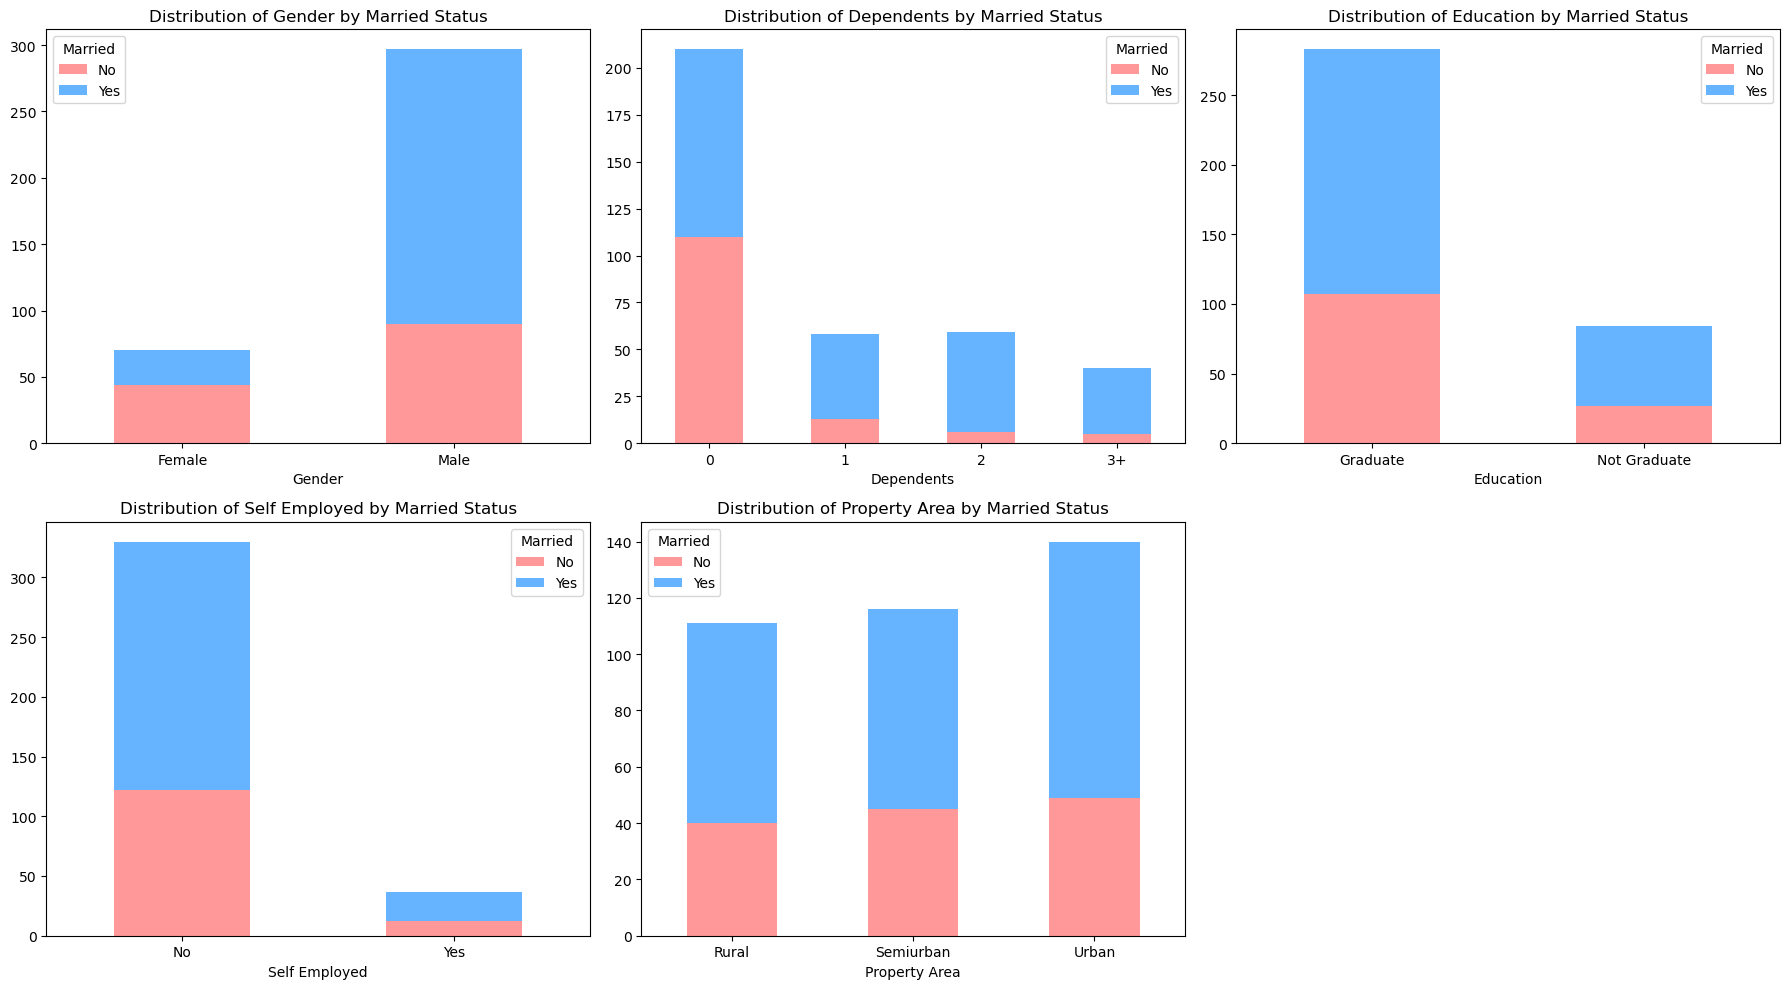

In [82]:
# Create subplots for each categorical variable
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot for Gender
pd.crosstab(loandata['Gender'], loandata['Married']).plot(kind='bar', stacked=True, ax=axes[0, 0], color=['#FF9999', '#66B3FF'])
axes[0, 0].set_title('Distribution of Gender by Married Status')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=0)

# Plot for Dependents
pd.crosstab(loandata['Dependents'], loandata['Married']).plot(kind='bar', stacked=True, ax=axes[0, 1], color=['#FF9999', '#66B3FF'])
axes[0, 1].set_title('Distribution of Dependents by Married Status')
axes[0, 1].set_xlabel('Dependents')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=0)

# Plot for Education
pd.crosstab(loandata['Education'], loandata['Married']).plot(kind='bar', stacked=True, ax=axes[0, 2], color=['#FF9999', '#66B3FF'])
axes[0, 2].set_title('Distribution of Education by Married Status')
axes[0, 2].set_xlabel('Education')
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=0)

# Plot for Self Employed
pd.crosstab(loandata['Self_Employed'], loandata['Married']).plot(kind='bar', stacked=True, ax=axes[1, 0], color=['#FF9999', '#66B3FF'])
axes[1, 0].set_title('Distribution of Self Employed by Married Status')
axes[1, 0].set_xlabel('Self Employed')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0)

# Plot for Property Area
pd.crosstab(loandata['Property_Area'], loandata['Married']).plot(kind='bar', stacked=True, ax=axes[1, 1], color=['#FF9999', '#66B3FF'])
axes[1, 1].set_title('Distribution of Property Area by Married Status')
axes[1, 1].set_xlabel('Property Area')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0)

# Hide the last subplot (empty)
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

# Task 4: Geospatial Analysis (Optional)
# If the dataset contains geographical information, visualize data on amap to identify regional trends.
# Use scatter plots or heatmaps to display data patterns across geographic locations.

<!-- Submission Guidelines
Organize your work in a Jupyter Notebook or any preferred environment.
Include clear explanations and interpretations for each visualization.
Provide comments and descriptions of your code to make it understandable.
Include relevant graphs, charts, or plots to support your analysis.
Submit your completed assessment document -->

<!-- Organize your work in a Jupyter Notebook or any preferredenvironment.

Include clear explanations and interpretations for each visualization.

Provide comments and descriptions of your code to make itunderstandable.

Include relevant graphs, charts, or plots to support your analysis.

Submit your completed assessment document. -->